In [1]:
import numpy as np

import sys
sys.path.insert(0, '../src')
from utils import *

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
mpl.rcParams["figure.facecolor"] = "white" # set to white the background behind axes and labels
mpl.rcParams["font.size"] = 18

In [3]:
AWS_FOLDER_COMPUTE = "./saved_results/aws_computed/"
SAVE_FOLDER = "./saved_results/comparison/"
import os
os.makedirs(SAVE_FOLDER, exist_ok=True)

In [4]:
# Import all the variables from the dump files

fred30_60_max_len_list = load_variables("fred_max_len_list.dump", AWS_FOLDER_COMPUTE)
int_max_len_list = load_variables("int_max_len_list.dump", AWS_FOLDER_COMPUTE)

fred30_60_time_list = load_variables("fred_time_list.dump", AWS_FOLDER_COMPUTE)
int_time_list = load_variables("int_time_list.dump", AWS_FOLDER_COMPUTE)
agnostic_int_time_list = load_variables("agnostic_int_time_list.dump", AWS_FOLDER_COMPUTE)

fred30_60_smN = load_variables("fred_smN.dump", AWS_FOLDER_COMPUTE)
int_smN = load_variables("int_smN.dump", AWS_FOLDER_COMPUTE)

# Notice: the following variables have a different structure w.r.t. the previous ones.
# Below we compare smN and ahp30_smN
ahp30_max_len_list = load_variables("ahp_max_len_list.dump", AWS_FOLDER_COMPUTE)
ahp30_mat_time_list = load_variables("ahp_mat_time_list.dump", AWS_FOLDER_COMPUTE)
ahp30_time_list = load_variables("ahp_time_list.dump", AWS_FOLDER_COMPUTE)
ahp30_smN = load_variables("ahp_smN.dump", AWS_FOLDER_COMPUTE)

In [5]:
print(len(int_smN))
print(len(fred30_60_smN))
print(len(ahp30_smN))

27
18
6


### Add trailing values to Fred and AHP data
In the Frederickson data, we don't have all the cases with N=120. We have 9 missing values.

For AHP, only values for N=30 and m=5,10 are available, but the data structure should have the same length as for Fred and Int.
There are 21 missing values.

In [6]:
fred_max_len_list = fred30_60_max_len_list + [0]*9
fred_time_list = fred30_60_time_list + [np.nan]*9
fred_smN = fred30_60_smN + [()]*9

ahp_max_len_list = ahp30_max_len_list + [0]*21
ahp_mat_time_list = ahp30_mat_time_list + [0]*21
ahp_time_list = ahp30_time_list + [np.nan]*21
ahp_smN = ahp30_smN + [()]*21

smN = int_smN

In [7]:
print(len(int_smN))
print(len(fred_smN))
print(len(ahp_smN))

27
27
27


### Pattern analysis
Compute the percentuale difference between all the triples of makespans (for the three patterns) for each algorithm

In [8]:
def difference(max_len_list):
    for i in range(len(max_len_list)//3):
        v1, v2, v3 = max_len_list[3*i:3*i+3]
        m = min(v1,v2,v3)
        M = max(v1,v2,v3)
        if M == 0:
            print("nan")
            continue
        diff = (M-m)/M
        print(str(int(round(diff, 2)*100))+"%")

In [9]:
print("Fred algorithm")
difference(fred_max_len_list)

print("\nInt algorithm")
difference(int_max_len_list)

print("\nAHP algorithm")
difference(ahp_max_len_list)

Fred algorithm
1%
7%
3%
5%
11%
5%
nan
nan
nan

Int algorithm
3%
10%
14%
6%
7%
10%
5%
9%
8%

AHP algorithm
2%
1%
nan
nan
nan
nan
nan
nan
nan


In [10]:
def difference_from_random(max_len_list):
    for i in range(len(max_len_list)//3):
        v1, v2, v3 = max_len_list[3*i:3*i+3]
        diff1 = abs(v1-v2)
        diff2 = abs(v1-v3)
        max_diff = max(diff1, diff2)
        if v1 == 0:
            print("nan")
            continue
        print(str(int(round(max_diff/v1, 2)*100))+"%")

In [11]:
print("Fred algorithm")
difference_from_random(fred_max_len_list)

print("\nOur")
difference_from_random(int_max_len_list)

print("\nAHP algorithm")
difference_from_random(ahp_max_len_list)

Fred algorithm
1%
7%
3%
5%
10%
5%
nan
nan
nan

Our
3%
10%
14%
4%
4%
6%
3%
6%
7%

AHP algorithm
2%
1%
nan
nan
nan
nan
nan
nan
nan


# Plots

In [12]:
smN

[('random', 5, 30),
 ('decreasing', 5, 30),
 ('increasing', 5, 30),
 ('random', 10, 30),
 ('decreasing', 10, 30),
 ('increasing', 10, 30),
 ('random', 20, 30),
 ('decreasing', 20, 30),
 ('increasing', 20, 30),
 ('random', 5, 60),
 ('decreasing', 5, 60),
 ('increasing', 5, 60),
 ('random', 10, 60),
 ('decreasing', 10, 60),
 ('increasing', 10, 60),
 ('random', 20, 60),
 ('decreasing', 20, 60),
 ('increasing', 20, 60),
 ('random', 5, 120),
 ('decreasing', 5, 120),
 ('increasing', 5, 120),
 ('random', 10, 120),
 ('decreasing', 10, 120),
 ('increasing', 10, 120),
 ('random', 20, 120),
 ('decreasing', 20, 120),
 ('increasing', 20, 120)]

In [13]:
# Useful function for plotting

def compute_labels(smn):
    labels = []
    for s,m,n in smn:
        labels.append("m={}\nn={}".format(m,n))
    
    return labels

def extr_30(array):
    return array[:9]

def extr_random(array):
    return array[0::3]


def extr_decreasing(array):
    return array[1::3]


def extr_increasing(array):
    return array[2::3]

In [14]:
extr_30(int_max_len_list)

[2842.3252957991876,
 2757.9281658722471,
 2842.3252957991876,
 1961.1626478995936,
 1759.2230622020925,
 1961.1626478995936,
 1580.5813239497966,
 1359.7410207340308,
 1580.5813239497966]

In [15]:
# PLOT CONFIGURATION PARAMETERS
YLIM=12000
PLT_W = 10
PLT_H = 6

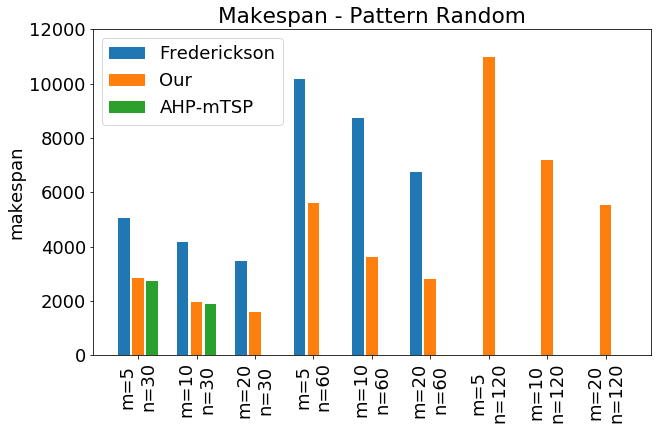

In [16]:
# Grouped bar plot
############# RANDOM #############

width = 0.5 # width of each bar
bar_dist = 0.1 # distance between bars of the same groups
group_dist = 0.8 # distance between bars of different groups
x_dist = width*3 + bar_dist*2 + group_dist

xs = np.arange(0, len(extr_random(smN))) * x_dist # scale the x coordinates to make space to the bars

int_xs = xs
fred_xs = xs - width - bar_dist
ahp_xs = int_xs + width + bar_dist

fig, ax = plt.subplots() # needed to rotate the labels

fred_bars = plt.bar(fred_xs, extr_random(fred_max_len_list), width)
int_bars= plt.bar(int_xs, extr_random(int_max_len_list), width)
ahp_bars = plt.bar(ahp_xs, extr_random(ahp_max_len_list), width)

plt.ylabel("makespan")
plt.title("Makespan - Pattern Random")
plt.xticks(xs, extr_random(compute_labels(smN)))
ax.set_ylim(top=YLIM)

plt.legend((fred_bars, int_bars, ahp_bars), ("Frederickson", "Our", "AHP-mTSP"))
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='center')

fig.set_size_inches(PLT_W, PLT_H)
fig.savefig(SAVE_FOLDER+"random_makespan.pdf", bbox_inches='tight', pad_inches=0.1)

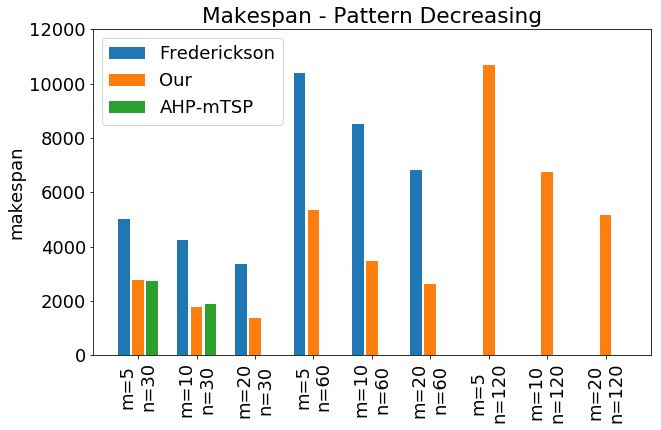

In [17]:
# Grouped bar plot
############# DECREASING #############

width = 0.5 # width of each bar
bar_dist = 0.1 # distance between bars of the same groups
group_dist = 0.8 # distance between bars of different groups
x_dist = width*3 + bar_dist*2 + group_dist

xs = np.arange(0, len(extr_decreasing(smN))) * x_dist # scale the x coordinates to make space to the bars

int_xs = xs
fred_xs = xs - width - bar_dist
ahp_xs = int_xs + width + bar_dist

fig, ax = plt.subplots() # needed to rotate the labels

fred_bars = plt.bar(fred_xs, extr_decreasing(fred_max_len_list), width)
int_bars= plt.bar(int_xs, extr_decreasing(int_max_len_list), width)
ahp_bars = plt.bar(ahp_xs, extr_decreasing(ahp_max_len_list), width)

plt.ylabel("makespan")
plt.title("Makespan - Pattern Decreasing")
plt.xticks(xs, extr_decreasing(compute_labels(smN)))
ax.set_ylim(top=YLIM)

plt.legend((fred_bars, int_bars, ahp_bars), ("Frederickson", "Our", "AHP-mTSP"))
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='center')

fig.set_size_inches(PLT_W, PLT_H)
fig.savefig(SAVE_FOLDER+"decreasing_makespan.pdf", bbox_inches='tight', pad_inches=0.1)

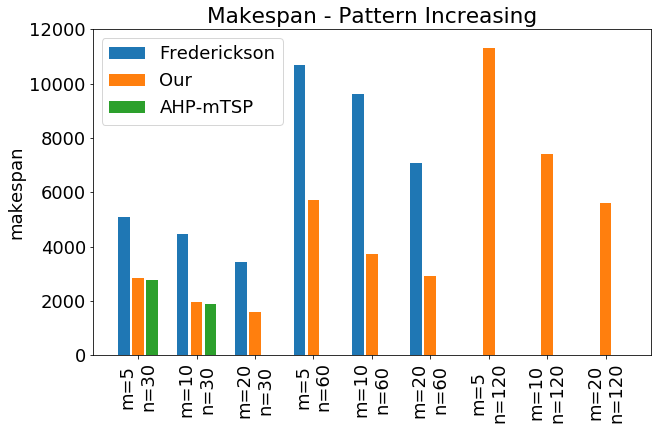

In [18]:
# Grouped bar plot
############# INCREASING #############

width = 0.5 # width of each bar
bar_dist = 0.1 # distance between bars of the same groups
group_dist = 0.8 # distance between bars of different groups
x_dist = width*3 + bar_dist*2 + group_dist

xs = np.arange(0, len(extr_increasing(smN))) * x_dist # scale the x coordinates to make space to the bars

int_xs = xs
fred_xs = xs - width - bar_dist
ahp_xs = int_xs + width + bar_dist

fig, ax = plt.subplots() # needed to rotate the labels

fred_bars = plt.bar(fred_xs, extr_increasing(fred_max_len_list), width)
int_bars= plt.bar(int_xs, extr_increasing(int_max_len_list), width)
ahp_bars = plt.bar(ahp_xs, extr_increasing(ahp_max_len_list), width)

plt.ylabel("makespan")
plt.title("Makespan - Pattern Increasing")
plt.xticks(xs, extr_increasing(compute_labels(smN)))
ax.set_ylim(top=YLIM)

plt.legend((fred_bars, int_bars, ahp_bars), ("Frederickson", "Our", "AHP-mTSP"))
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='center')

fig.set_size_inches(PLT_W, PLT_H)
fig.savefig(SAVE_FOLDER+"increasing_makespan.pdf", bbox_inches='tight', pad_inches=0.1)

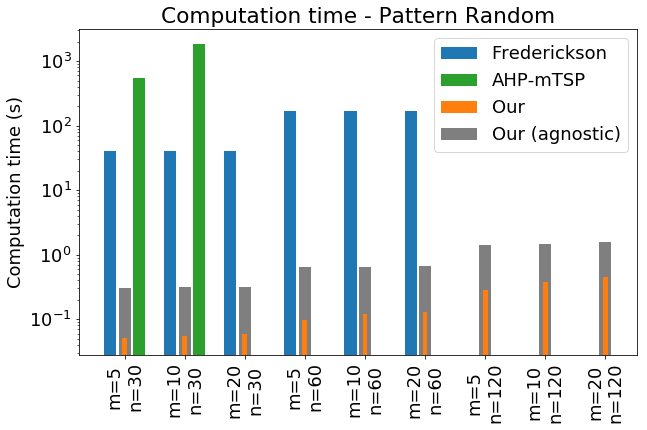

In [19]:
#### RUNTIME COMPARISON - Bar Plot ####

fig, ax = plt.subplots() # needed to rotate the labels

ax.set_title("Computation time - Pattern Random")

width = 0.5 # width of each bar
bar_dist = 0.1 # distance between bars of the same groups
group_dist = 0.8 # distance between bars of different groups
x_dist = width*3 + bar_dist*2 + group_dist

xs = np.arange(0, len(extr_random(smN))) * x_dist # scale the x coordinates to make space to the bars
int_xs = xs
fred_xs = xs - width - bar_dist
ahp_xs = int_xs + width + bar_dist

ahp_bars = ax.bar(ahp_xs, extr_random(ahp_time_list), width, color="tab:green", log=True)
fred_bars = ax.bar(fred_xs, extr_random(fred_time_list), width, color="tab:blue", log=True)
a_int_bars = ax.bar(int_xs, extr_random(agnostic_int_time_list), width, color="tab:gray", log=True)
int_bars = ax.bar(int_xs, extr_random(int_time_list), width/5*2, color="tab:orange", log=True)

ax.set_ylabel("Computation time (s)")
ax.legend((fred_bars, ahp_bars, int_bars, a_int_bars), ("Frederickson", "AHP-mTSP", "Our", "Our (agnostic)"), loc='upper right')
ax.set_xticks(xs)
ax.set_xticklabels(extr_increasing(compute_labels(smN)))
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='center')

fig.set_size_inches(PLT_W, PLT_H)
fig.savefig(SAVE_FOLDER+"time_comparison_random.pdf", bbox_inches='tight', pad_inches=0.1)

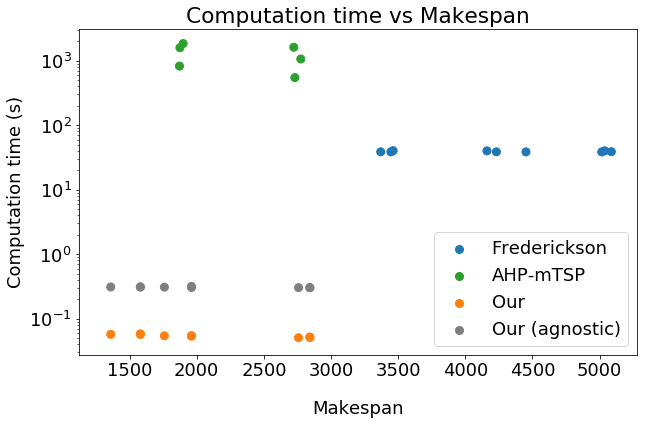

In [20]:
#### SCATTER PLOT Makespan vs Runtime ####

s=[64]*9 # size of the dots (radius^2)

fig, ax = plt.subplots() # needed to rotate the labels

ax.set_title("Computation time vs Makespan")

plt.yscale("log")

plt.scatter(extr_30(fred_max_len_list), extr_30(fred_time_list), s=s, color="tab:blue")
plt.scatter(extr_30(ahp_max_len_list), extr_30(ahp_time_list), s=s, color="tab:green")
plt.scatter(extr_30(int_max_len_list), extr_30(int_time_list), s=s, color="tab:orange")
plt.scatter(extr_30(int_max_len_list), extr_30(agnostic_int_time_list), s=s, color="tab:gray")

plt.xlabel("Makespan", labelpad=20)
plt.ylabel("Computation time (s)")

plt.legend(("Frederickson", "AHP-mTSP", "Our", "Our (agnostic)"), loc="lower right")

fig.set_size_inches(PLT_W, PLT_H)
fig.savefig(SAVE_FOLDER+"scatter_comparison_random.pdf", bbox_inches='tight', pad_inches=0.1)